In [ ]:
pip install tslearn
pip install japanize-matplotlib

SyntaxError: invalid syntax (<ipython-input-39-8b0b5e2c0e3a>, line 1)

In [ ]:
pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import cdist_dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df = pd.read_excel('tm_quote.xlsx')

# インデックスをリセット
df.reset_index(drop=True, inplace=True)
df = df.set_index('Date')
display(df.head())

,米ドル,英ポンド,ユーロ,カナダドル,スイスフラン,スウェーデンクローネ,デンマーククローネ,ノルウェークローネ,オーストラリアドル,ニュージーランドドル,南アフリカランド,バーレーンディナール,中国人民元,香港ドル,インドルピー,フィリピンペソ,シンガポールドル,タイバーツ,クウェートディナール,サウジアラビアリアル,UAEディルハム,メキシコペソ,パプアニューギニアキナ,ハンガリーフォリント,チェココロナ,ポーランドズロチ,トルコリラ
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-03-03,150.58,189.84,156.78,104.25,166.90,14.04,21.02,13.40,93.71,84.43,8.09,399.63,20.65,19.36,1.72,2.60,111.64,4.41,487.16,40.15,41.01,7.35,38.73,0.39,6.24,37.20,4.12
2025-03-04,149.26,189.49,156.47,102.99,166.44,14.20,20.98,13.34,92.68,83.68,8.02,396.23,20.43,19.19,1.71,2.59,110.88,4.39,484.45,39.80,40.65,7.19,38.32,0.39,6.25,37.57,4.09
2025-03-05,149.86,191.73,159.26,104.03,168.34,14.38,21.35,13.51,93.81,84.75,8.10,397.82,20.64,19.28,1.72,2.60,111.96,4.44,486.24,39.96,40.81,7.29,37.27,0.40,6.35,38.24,4.11
2025-03-06,149.27,192.53,161.23,104.02,167.49,14.65,21.61,13.69,94.50,85.41,8.16,396.15,20.61,19.20,1.72,2.61,112.12,4.44,484.01,39.80,40.65,7.32,37.12,0.40,6.46,38.81,4.09
2025-03-07,148.09,190.78,159.73,103.55,167.77,14.55,21.42,13.60,93.67,84.93,8.17,392.71,20.44,19.05,1.70,2.58,111.11,4.38,480.97,39.50,40.33,7.31,38.09,0.40,6.39,38.29,4.06


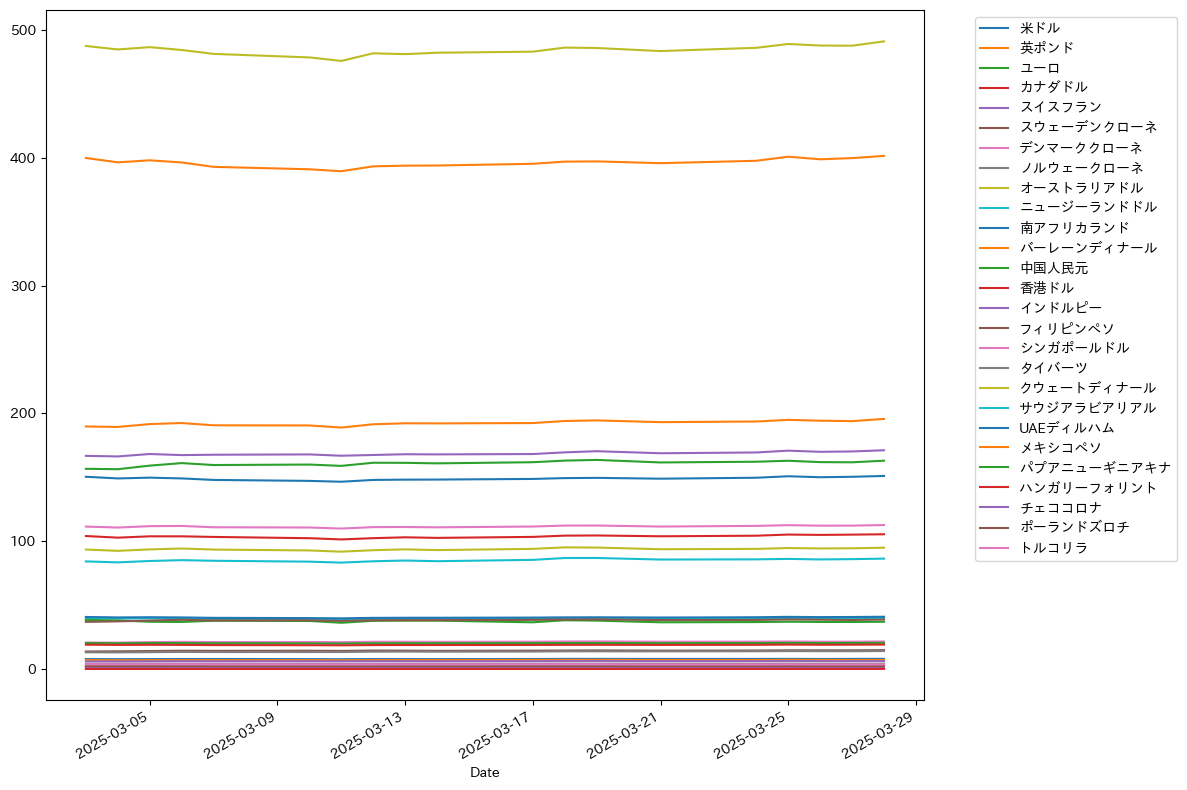

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# DataFrame のプロット先として axes を指定
df.plot(ax=axes)

# 凡例を右側に配置
axes.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [ ]:
df_change = pd.read_excel('tm_quote_change.xlsx')

# インデックスをリセット
df_change.reset_index(drop=True, inplace=True)
df_change = df_change.drop(df_change.index[0])
df_change = df_change.set_index('Date')
display(df_change.head())

,米ドル,英ポンド,ユーロ,カナダドル,スイスフラン,スウェーデンクローネ,デンマーククローネ,ノルウェークローネ,オーストラリアドル,ニュージーランドドル,南アフリカランド,バーレーンディナール,中国人民元,香港ドル,インドルピー,フィリピンペソ,シンガポールドル,タイバーツ,クウェートディナール,サウジアラビアリアル,UAEディルハム,メキシコペソ,パプアニューギニアキナ,ハンガリーフォリント,チェココロナ,ポーランドズロチ,トルコリラ
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-03-04,1.32,0.35,0.31,1.26,0.46,-0.16,0.04,0.06,1.03,0.75,0.07,3.40,0.22,0.17,0.01,0.01,0.76,0.02,2.71,0.35,0.36,0.16,0.41,0.00,-0.01,-0.37,0.03
2025-03-05,-0.60,-2.24,-2.79,-1.04,-1.90,-0.18,-0.37,-0.17,-1.13,-1.07,-0.08,-1.59,-0.21,-0.09,-0.01,-0.01,-1.08,-0.05,-1.79,-0.16,-0.16,-0.10,1.05,-0.01,-0.10,-0.67,-0.02
2025-03-06,0.59,-0.80,-1.97,0.01,0.85,-0.27,-0.26,-0.18,-0.69,-0.66,-0.06,1.67,0.03,0.08,0.00,-0.01,-0.16,0.00,2.23,0.16,0.16,-0.03,0.15,0.00,-0.11,-0.57,0.02
2025-03-07,1.18,1.75,1.50,0.47,-0.28,0.10,0.19,0.09,0.83,0.48,-0.01,3.44,0.17,0.15,0.02,0.03,1.01,0.06,3.04,0.30,0.32,0.01,-0.97,0.00,0.07,0.52,0.03
2025-03-10,0.75,0.12,-0.37,0.99,-0.25,-0.09,-0.04,-0.01,0.67,0.70,0.10,1.89,0.09,0.09,0.01,0.02,0.19,0.01,2.75,0.22,0.20,0.04,0.19,0.00,-0.01,-0.11,0.02


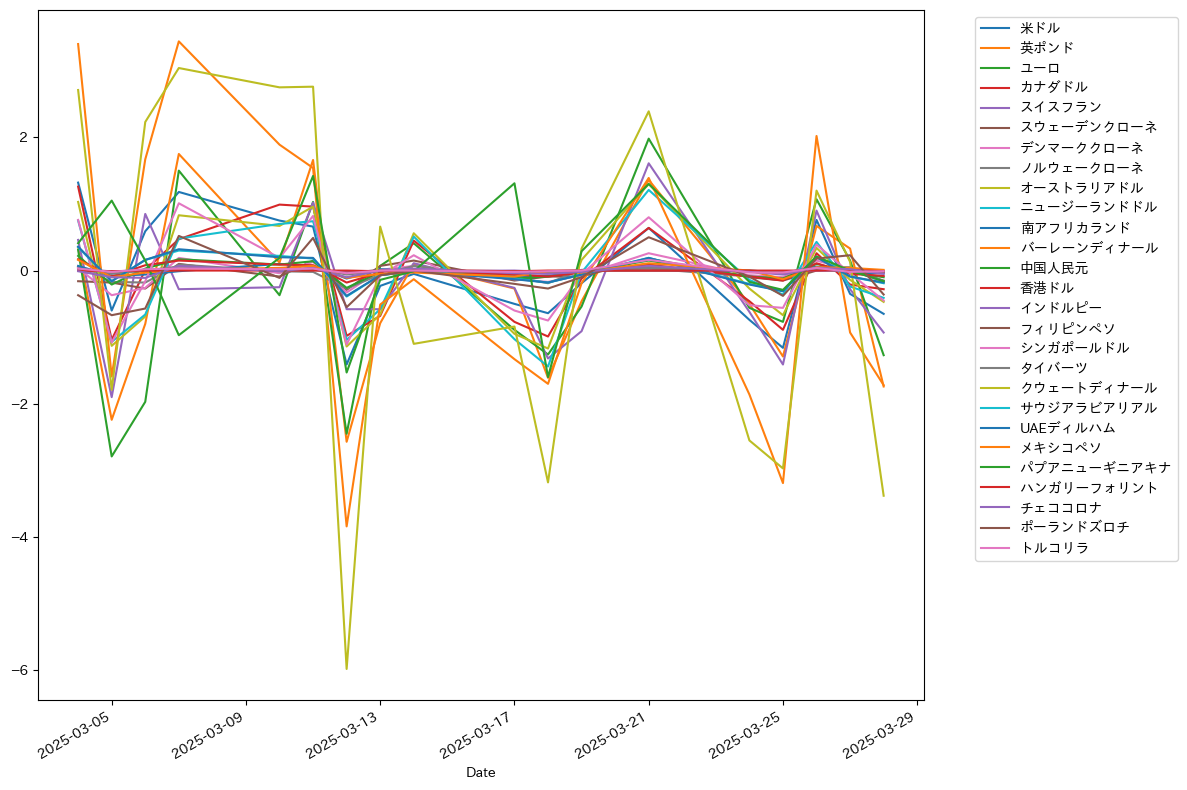

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# DataFrame のプロット先として axes を指定
df_change.plot(ax=axes)

# 凡例を右側に配置
axes.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

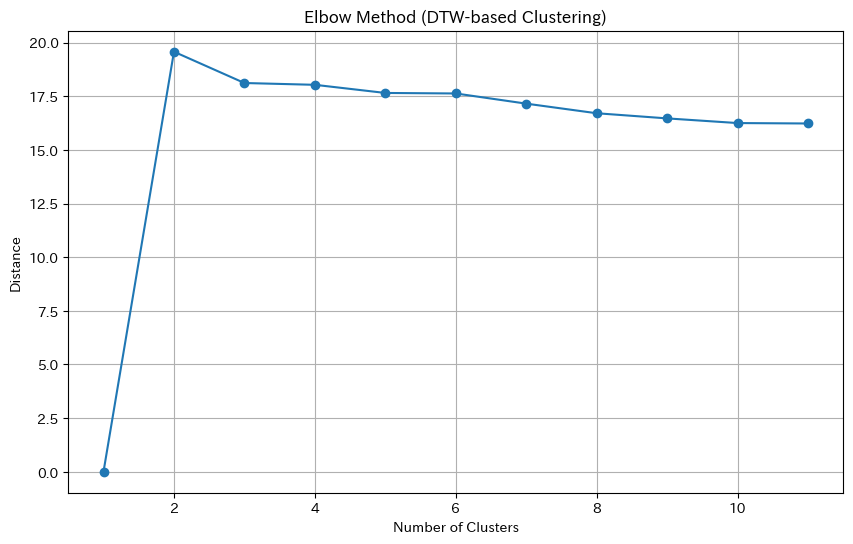

In [ ]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt


# データを標準化（平均0, 分散1）
df_change = (df_change - df_change.mean()) / df_change.std()
df_change = df_change.T  # 通貨ごとに行を分ける（必要な形に変換）

# 自作DTW距離関数（シンプルな実装）
def dtw_distance(s1, s2):
    n, m = len(s1), len(s2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s1[i - 1] - s2[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    return dtw_matrix[n, m]

# DTW距離行列の作成
n = df_change.shape[0]
dtw_distances = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        dist = dtw_distance(df_change.iloc[i].values, df_change.iloc[j].values)
        dtw_distances[i, j] = dist
        dtw_distances[j, i] = dist

# 階層クラスタリング用に距離を変換
condensed_distances = squareform(dtw_distances)
Z = linkage(condensed_distances, method='average')

# エルボー法：クラスター数 vs 距離（linkageの距離）
last = Z[-10:, 2]
k_vals = range(1, 11)
acceleration = np.diff(last, 2)  # 2次差分

# グラフ描画
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), np.concatenate(([0], last[::-1])), marker='o')
plt.title("Elbow Method (DTW-based Clustering)")
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


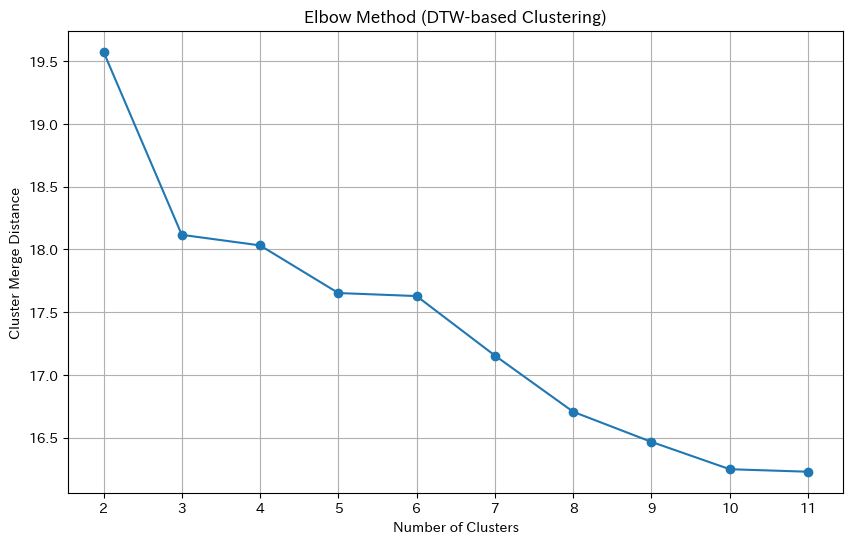

In [ ]:
# 修正：クラスタ数（1〜10）に対応する距離のプロット
x_vals = list(range(2, 12))  # クラスタ数（クラスタ数 = データ数 - クラスタID）
y_vals = last[::-1]  # linkage の距離（大きいほどクラスタ統合時の距離が大きい）

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker='o')
plt.title("Elbow Method (DTW-based Clustering)")
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Merge Distance")
plt.grid(True)
plt.xticks(x_vals)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# クラスタ数（今回は4と仮定）
optimal_k = 4

# linkage 結果からクラスタ番号を取得
cluster_labels = fcluster(Z, t=optimal_k, criterion='maxclust')

# 通貨名とクラスタ番号の対応表を作成
cluster_df = pd.DataFrame({
    'Currency': df_change.index,
    'Cluster': cluster_labels
}).sort_values(by='Cluster')


In [ ]:
# linkageとクラスタリング（クラスター数 = 4）
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(squareform(dtw_distances), method='average')
cluster_labels = fcluster(Z, t=4, criterion='maxclust')

# 正しい通貨ごとのクラスタ結果を DataFrame にまとめる
cluster_df = pd.DataFrame({
    'Currency': df_change.index,
    'Cluster': cluster_labels
}).sort_values(by='Cluster').reset_index(drop=True)

cluster_df


,Currency,Cluster
0,2025-03-04,1
1,2025-03-05,1
2,2025-03-06,1
3,2025-03-07,1
4,2025-03-10,1
5,2025-03-13,2
6,2025-03-18,2
7,2025-03-17,2
8,2025-03-19,2
9,2025-03-26,2


In [ ]:
# ステップ1: 生データから再処理（通貨ごとにクラスタリングできるように）

# 再読み込み
df = pd.read_excel('tm_quote.xlsx')

# 日付列を除去して数値データのみに
ts_data = df.drop(columns=["Date"])

# 欠損値補完（線形補完→前後補完）
ts_data = ts_data.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')

# 標準化（通貨ごと：平均0、分散1）
ts_data = (ts_data - ts_data.mean()) / ts_data.std()

# 転置して「通貨 × 日付」 → 「行 = 通貨、列 = 時系列」に変換
ts_data = ts_data.T

# DTW距離関数（再掲）
def dtw_distance(s1, s2):
    n, m = len(s1), len(s2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s1[i - 1] - s2[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    return dtw_matrix[n, m]

# DTW距離行列の計算
n = ts_data.shape[0]
dtw_distances = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        dist = dtw_distance(ts_data.iloc[i].values, ts_data.iloc[j].values)
        dtw_distances[i, j] = dist
        dtw_distances[j, i] = dist

# linkageとクラスタリング（クラスター数 = 4）
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(squareform(dtw_distances), method='average')
cluster_labels = fcluster(Z, t=4, criterion='maxclust')

# 正しい通貨ごとのクラスタ結果を DataFrame にまとめる
cluster_df = pd.DataFrame({
    'Currency': ts_data.index,
    'Cluster': cluster_labels
}).sort_values(by='Cluster').reset_index(drop=True)

cluster_df


<ipython-input-64-58380e05e20a>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_data = ts_data.interpolate(method='linear', axis=0).fillna(method='bfill').fillna(method='ffill')


,Currency,Cluster
0,米ドル,1
1,カナダドル,1
2,インドルピー,1
3,フィリピンペソ,1
4,中国人民元,1
5,香港ドル,1
6,バーレーンディナール,1
7,シンガポールドル,1
8,サウジアラビアリアル,1
9,クウェートディナール,1


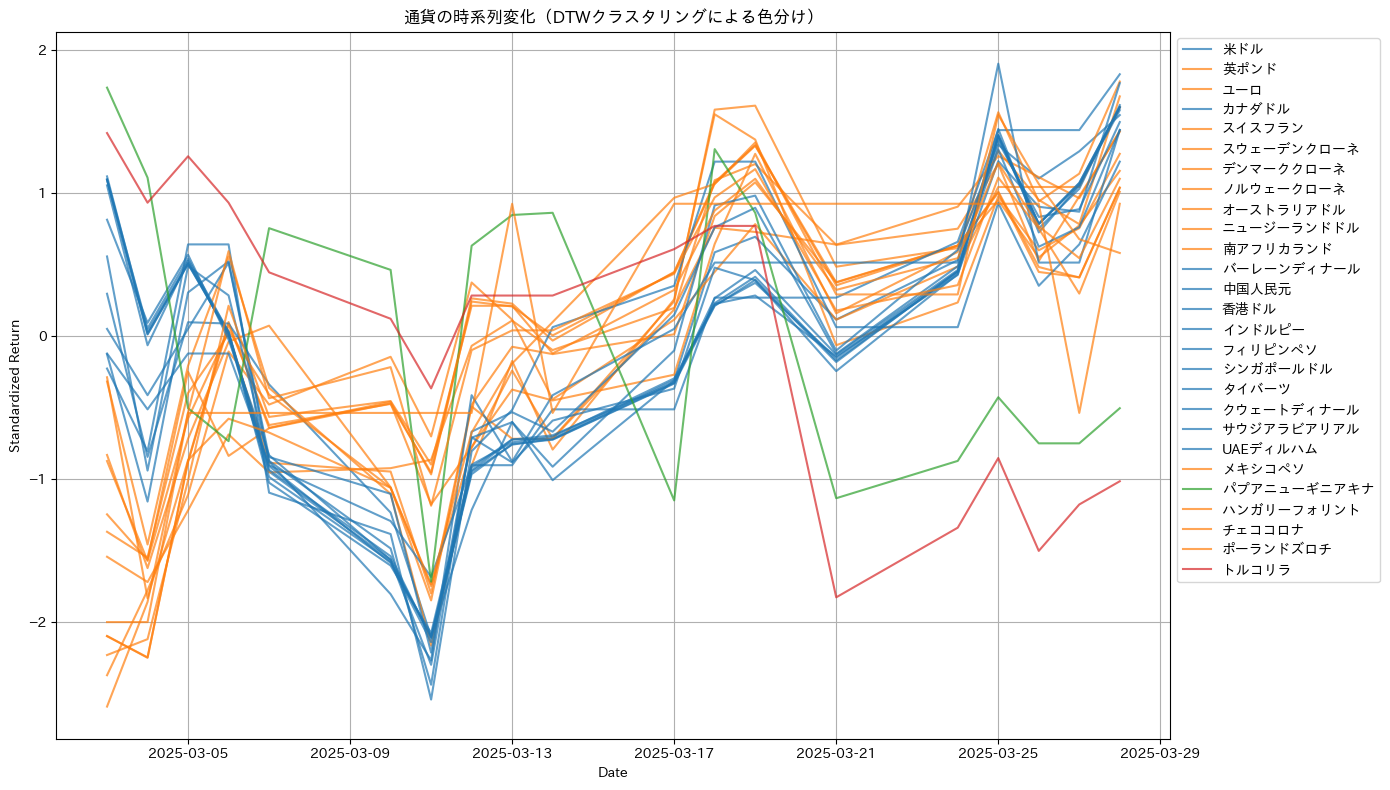

In [ ]:
# 可視化: 各通貨の動きをクラスタごとに色分けしてプロット
import matplotlib.pyplot as plt

# 各通貨のクラスタを辞書化
cluster_map = dict(zip(cluster_df['Currency'], cluster_df['Cluster']))

# 色マップの定義（最大4クラスタに対応）
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# グラフ描画
plt.figure(figsize=(14, 8))
for i, row in ts_data.iterrows():
    cluster_id = cluster_map[i]
    plt.plot(df["Date"], row.values, label=i, color=colors[cluster_id - 1], alpha=0.7)

plt.title("通貨の時系列変化（DTWクラスタリングによる色分け）")
plt.xlabel("Date")
plt.ylabel("Standardized Return")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


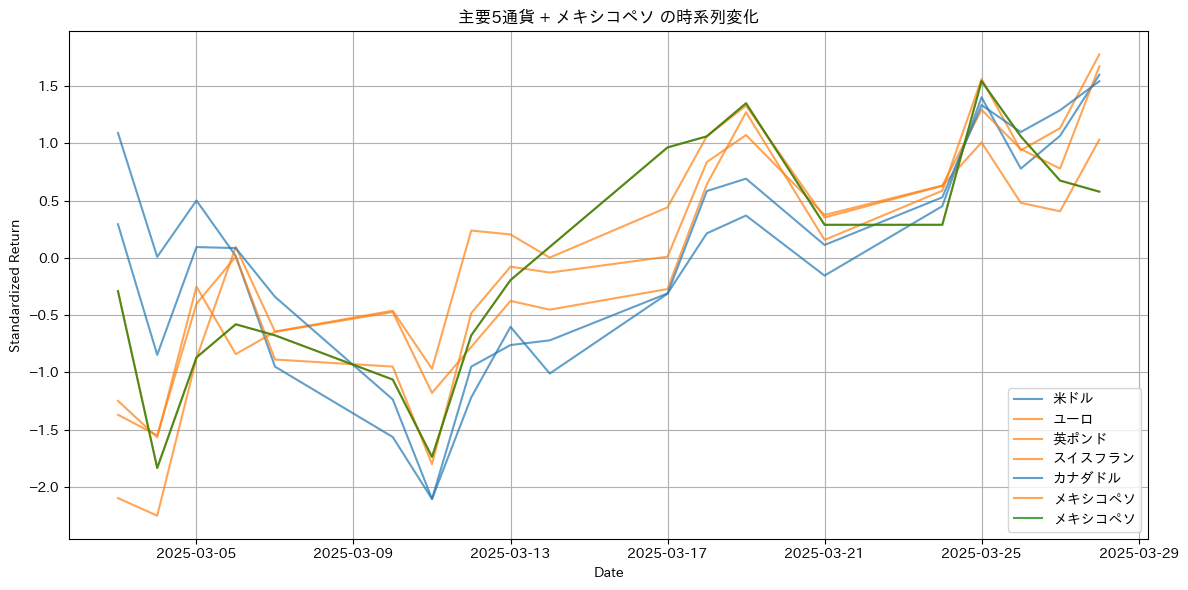

In [ ]:
# 通貨リストから主要5通貨 + メキシコペソを抽出
major_5_and_mex = ['米ドル', 'ユーロ', '英ポンド', 'スイスフラン', 'カナダドル', 'メキシコペソ']

# 対象が含まれているかを確認（日本円はデータに含まれていない可能性あり）
available = [c for c in major_5_and_mex if c in ts_data.index]

# 抜き出し
subset = ts_data.loc[available]

# グラフ描画
plt.figure(figsize=(12, 6))
for i, row in subset.iterrows():
    cluster_id = cluster_map[i]
    plt.plot(df["Date"], row.values, label=i, color=colors[cluster_id - 1], alpha=0.7)

plt.plot(df["Date"], subset.loc["メキシコペソ"], label="メキシコペソ", color='green', alpha=0.7)
plt.title("主要5通貨 + メキシコペソ の時系列変化")
plt.xlabel("Date")
plt.ylabel("Standardized Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

